# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Preprocessing

In [ ]:
df = pd.read_csv('Telco Customer Churn.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn_yes = df[df["Churn"] == "Yes"]
churn_no = df[df["Churn"] == "No"]

In [ ]:
churn_no_undersampled = resample(churn_no, replace=False, n_samples=len(churn_yes), random_state=42)

In [ ]:
df_undersampled = pd.concat([churn_yes, churn_no_undersampled])

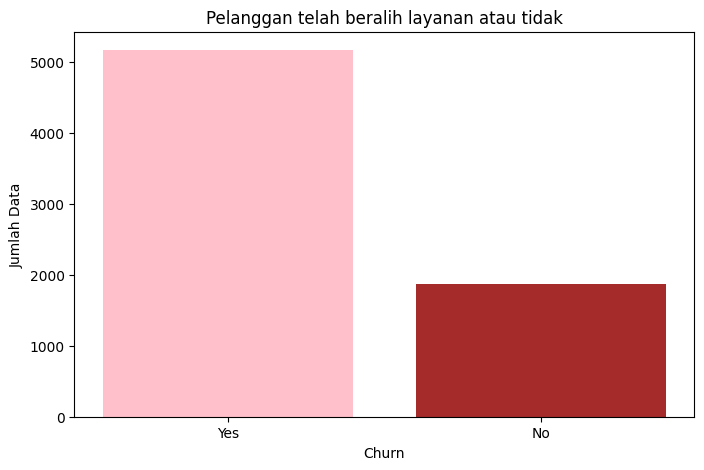

In [ ]:
count = df['Churn'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(['Yes', 'No'], count, color=['pink','brown'])
plt.title('Pelanggan telah beralih layanan atau tidak')
plt.xlabel('Churn')
plt.ylabel('Jumlah Data')
plt.show()

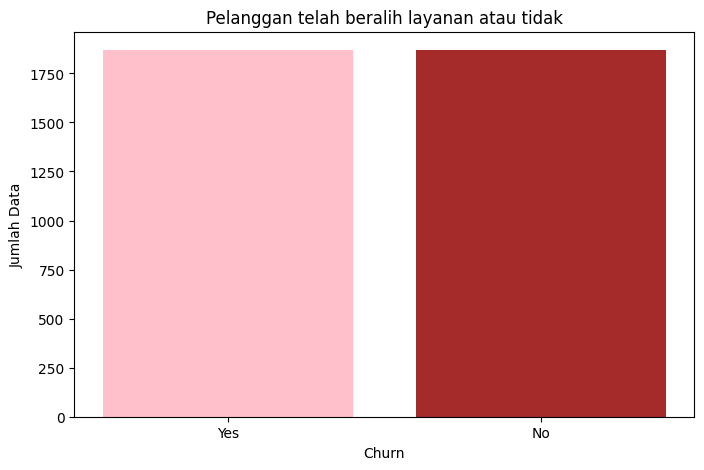

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(["Yes", "No"], [len(churn_yes), len(churn_no_undersampled)], color=["pink", "brown"])
plt.title("Pelanggan telah beralih layanan atau tidak")
plt.xlabel("Churn")
plt.ylabel("Jumlah Data")
plt.show()

In [ ]:
cols_to_use = ['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
df = df[cols_to_use]

# Data Cleaning

In [ ]:
print(df.isnull().sum())

tenure            0
Contract          0
PaymentMethod     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64


In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  112


In [ ]:
df.drop_duplicates(inplace=True)

# Encoding

In [ ]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [ ]:
df.dtypes

tenure              int64
Contract            int64
PaymentMethod       int64
MonthlyCharges    float64
TotalCharges        int64
Churn               int64
dtype: object

# Splitting

In [ ]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Ukuran data train =', X_train.shape)
print('Ukuran data test =', X_test.shape)

Ukuran data train = (5544, 5)
Ukuran data test = (1387, 5)


# Training XGB

In [ ]:
classifier = XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.05, random_state=42)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

# Predicting Data Test Set

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy*100))

Akurasi: 79.31%


# Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[923 107]
 [180 177]]


0.7930785868781542

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1030
           1       0.62      0.50      0.55       357

    accuracy                           0.79      1387
   macro avg       0.73      0.70      0.71      1387
weighted avg       0.78      0.79      0.78      1387



# K-Neighbours

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7795729948066936


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1112  159]
 [ 223  239]]


0.7795729948066936

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1271
           1       0.60      0.52      0.56       462

    accuracy                           0.78      1733
   macro avg       0.72      0.70      0.70      1733
weighted avg       0.77      0.78      0.77      1733



# SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', C=1.0, random_state=42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7813040969417195


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1167  104]
 [ 275  187]]


0.7813040969417195

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1271
           1       0.64      0.40      0.50       462

    accuracy                           0.78      1733
   macro avg       0.73      0.66      0.68      1733
weighted avg       0.76      0.78      0.76      1733



# Kernel SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7818811309867282


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1139  132]
 [ 246  216]]


0.7818811309867282

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1271
           1       0.62      0.47      0.53       462

    accuracy                           0.78      1733
   macro avg       0.72      0.68      0.70      1733
weighted avg       0.77      0.78      0.77      1733



# GaussianNB

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.740334679746105


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[940 331]
 [119 343]]


0.740334679746105

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1271
           1       0.51      0.74      0.60       462

    accuracy                           0.74      1733
   macro avg       0.70      0.74      0.71      1733
weighted avg       0.79      0.74      0.75      1733



# Decision Tree Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7593768032313907


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1117  154]
 [ 263  199]]


0.7593768032313907

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1271
           1       0.56      0.43      0.49       462

    accuracy                           0.76      1733
   macro avg       0.69      0.65      0.67      1733
weighted avg       0.74      0.76      0.75      1733

